In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import skew, kurtosis

# Função para aplicar um filtro passa-alta ao sinal
def high_pass_filter(signal_data, cutoff_frequency=1.0, sampling_rate=1000):
    b, a = signal.butter(4, cutoff_frequency / (sampling_rate / 2), btype='high', analog=False)
    filtered_signal = signal.filtfilt(b, a, signal_data)
    return filtered_signal

# Funções para calcular os índices de qualidade
def compute_iSQI(detected_peaks, total_beats):
    return len(detected_peaks) / total_beats * 100

def compute_bSQI(detected_peaks_wqrs, detected_peaks_eplimited):
    common_peaks = set(detected_peaks_wqrs).intersection(detected_peaks_eplimited)
    return len(common_peaks) / len(detected_peaks_wqrs) * 100

def compute_fSQI(ecg_signal, sampling_rate=1000):
    fn = 0.5 * sampling_rate  # Frequência de Nyquist
    power_5_20Hz = np.sum(np.square(ecg_signal[(5 <= fn) & (fn <= 20)]))
    power_0_fnHz = np.sum(np.square(ecg_signal[fn <= 0.5 * sampling_rate]))
    return power_5_20Hz / power_0_fnHz

def compute_sSQI(ecg_signal):
    return skew(ecg_signal)

def compute_kSQI(ecg_signal):
    return kurtosis(ecg_signal)

def compute_pSQI(ecg_signal, epsilon=1.0):
    dxm_dt = np.gradient(ecg_signal)
    flat_line_percentage = np.sum(np.abs(dxm_dt) < epsilon) / len(ecg_signal) * 100
    return flat_line_percentage


iSQI: 0.04
bSQI: 0.0
fSQI: 0.0
sSQI: -0.011545674838199535
kSQI: -0.7439193086783167
pSQI: 100.0


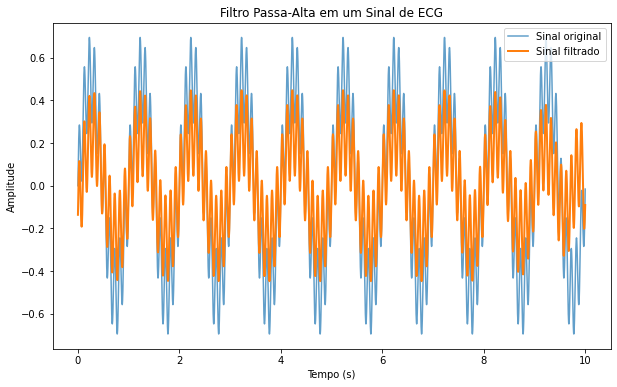

In [2]:
# Gere um sinal de exemplo (substitua isso pelo seu sinal real)
sampling_rate = 1000
t = np.arange(0, 10, 1/sampling_rate)
ecg_signal = 0.5 * np.sin(2 * np.pi * 1 * t) + 0.2 * np.sin(2 * np.pi * 10 * t)

# Aplicar filtro passa-alta
filtered_ecg = high_pass_filter(ecg_signal)

# Suponha que você já tenha os picos QRS detectados (substitua isso pelos seus próprios dados)
detected_peaks_eplimited = [100, 250, 600, 750]
detected_peaks_wqrs = [80, 200, 500, 800]

# Calcular índices de qualidade
iSQI_value = compute_iSQI(detected_peaks_eplimited, len(t))
bSQI_value = compute_bSQI(detected_peaks_wqrs, detected_peaks_eplimited)
fSQI_value = compute_fSQI(filtered_ecg)
sSQI_value = compute_sSQI(filtered_ecg)
kSQI_value = compute_kSQI(filtered_ecg)
pSQI_value = compute_pSQI(filtered_ecg)

# Imprimir os valores dos índices de qualidade
print(f"iSQI: {iSQI_value}")
print(f"bSQI: {bSQI_value}")
print(f"fSQI: {fSQI_value}")
print(f"sSQI: {sSQI_value}")
print(f"kSQI: {kSQI_value}")
print(f"pSQI: {pSQI_value}")

# Plotar os sinais original e filtrado
plt.figure(figsize=(10, 6))
plt.plot(t, ecg_signal, label='Sinal original', alpha=0.7)
plt.plot(t, filtered_ecg, label='Sinal filtrado', linewidth=2)
plt.title('Filtro Passa-Alta em um Sinal de ECG')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()